In [ ]:
import pandas as pd
import zipfile
from io import BytesIO
import requests

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00577/codon_usage.csv.zip'
r = requests.get(url)
buf1 = BytesIO(r.content)
with zipfile.ZipFile(buf1, "r") as f:
    for name in f.namelist():
        if name.endswith('.csv'):
            with f.open(name) as zd:
                df = pd.read_csv(zd, encoding='latin1', sep=',')            
            break

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.0218,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131


In [ ]:
df['Kingdom'].value_counts()

bct    2920
vrl    2832
pln    2523
vrt    2077
inv    1345
mam     572
phg     220
rod     215
pri     180
arc     126
plm      18
Name: Kingdom, dtype: int64

In [ ]:
df['DNAtype'].value_counts()

0     9267
1     2899
2      816
4       31
12       5
3        2
9        2
5        2
11       2
6        1
7        1
Name: DNAtype, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


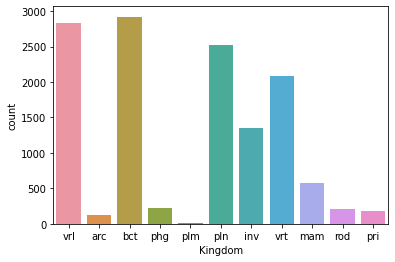

In [ ]:
sns.countplot(df['Kingdom'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


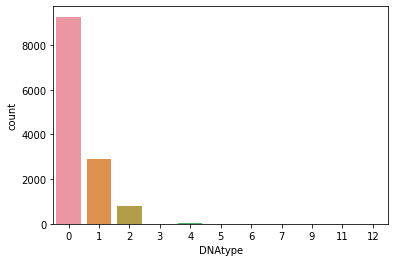

In [ ]:
sns.countplot(df['DNAtype'])

In [ ]:
import numpy as np

#remplazar valores 'non-B hepatitis virus','12;I', '-' con NAN 
df['UUU'] = df['UUU'].replace(['non-B hepatitis virus','12;I'], np.nan)
df['UUC'] = df['UUC'].replace('-', np.nan)

#convertir las columnas a tipo float32 porque inicialmente se encontraban tipo objeto

df['UUU'] = df['UUU'].astype('float32')
df['UUC'] = df['UUC'].astype('float32')

In [ ]:
#eliminar registros que tienen valores NAN (para este caso sólo eliminará dos registros)
df.dropna(inplace=True)

In [ ]:
#Copia de dataset para modelos de clasificación con DNA y Kingdom
df_dna = df.copy()
df_kingdom = df.copy()

### DNA

In [ ]:
count_dnatype = df_dna['DNAtype'].value_counts()

# convirtiendo a tipo dataframa las clases DNAType & cantidad
df_counts_dna = pd.DataFrame(count_dnatype)
df_counts_reset_dna = df_counts_dna.reset_index()
df_counts_reset_dna.columns = ['DNAType_unique', 'counts'] # change column names

for i in range(len(df_counts_reset_dna)):
  if df_counts_reset_dna['counts'][i] <= 31:
    df_dna.drop(df_dna[df_dna['DNAtype']==df_counts_reset_dna['DNAType_unique'][i]].index, axis=0, inplace=True)    

In [ ]:
df_dna['DNAtype'].value_counts()

0    9265
1    2899
2     816
Name: DNAtype, dtype: int64

In [ ]:
X_dna = df_dna.drop(columns = ['DNAtype', 'Kingdom', 'SpeciesName', 'SpeciesID'], axis = 1)
y_dna = df_dna['DNAtype']

In [ ]:
print("Dimensión X ", X_dna.shape)
print("Dimensión y ", y_dna.shape)

Dimensión X  (12980, 65)
Dimensión y  (12980,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_dna, X_test_dna, y_train_dna, y_test_dna = train_test_split(X_dna, y_dna, test_size = 0.2, random_state = 0)

In [ ]:
from pprint import pprint
rf_grid_dna = {'max_depth':[3,5,10,None],
          'n_estimators':[10,100,200,300,400,500],
          'max_features':['auto', 'sqrt'],
          'criterion':['gini','entropy'],
          'bootstrap':[True,False],
          'min_samples_leaf':[1, 2, 4],
          'min_samples_split': [2, 4, 5, 10]
  }
print('Los valores a probar en la búsqueda por grilla son:')
pprint(rf_grid_dna)

Los valores a probar en la búsqueda por grilla son:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 5, 10],
 'n_estimators': [10, 100, 200, 300, 400, 500]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_grid_rfc_dna = RandomForestClassifier()
rf_grid_search_dna = RandomizedSearchCV(
    estimator=model_grid_rfc_dna,
    param_distributions=rf_grid_dna,
    n_jobs=-1,    
    cv=3
)
rf_grid_search_dna.fit(X_train_dna, y_train_dna)

rf_gridsearch_best = rf_grid_search_dna.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid_search_dna.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento DNA:', rf_gridsearch_best.score(X_train_dna, y_train_dna))
print('Exactitud luego de búsqueda en grilla en validación DNA:', rf_gridsearch_best.score(X_test_dna, y_test_dna))

Los hiperparámetros del mejor modelo son:
{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

Exactitud luego de búsqueda en grilla en entrenamiento DNA: 0.9975924499229584
Exactitud luego de búsqueda en grilla en validación DNA: 0.9934514637904468


In [ ]:
# Aplicando SmoteTomek
from imblearn.combine import SMOTETomek
smt_dna = SMOTETomek()
X_train_dna_smt, y_train_dna_smt = smt_dna.fit_resample(X_train_dna, y_train_dna)
print(f'''Cambio de X train dna antes de SMOTE: {X_train_dna.shape} 
Cambio de X train dna después de SMOTE: {X_train_dna_smt.shape}''')


print('\n Balance de class DNA :')
y_train_dna_smt.value_counts()

Cambio de X train dna antes de SMOTE: (10384, 65) 
Cambio de X train dna después de SMOTE: (19226, 65)

 Balance de class DNA :


2    6600
1    6390
0    6236
Name: DNAtype, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca_dna = PCA(n_components=3)
X_train_smt_dna_pca = pca_dna.fit_transform(X_train_dna_smt)
X_test_dna_pca = pca_dna.transform(X_test_dna)
pca_dna.explained_variance_ratio_

array([1.00000000e+00, 1.21008111e-14, 8.24577844e-15])

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import RandomizedSearchCV

model_grid_rfc_dna_pca = RandomForestClassifier()
rf_grid_search_dna_pca = RandomizedSearchCV(
    estimator=model_grid_rfc_dna_pca,
    param_distributions=rf_grid_dna,
    n_jobs=-1,    
    cv=3
)
rf_grid_search_dna_pca.fit(X_train_smt_dna_pca, y_train_dna_smt)

rf_gridsearch_best_pca = rf_grid_search_dna_pca.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid_search_dna_pca.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento DNA:', rf_gridsearch_best_pca.score(X_train_smt_dna_pca, y_train_dna_smt))
print('Exactitud luego de búsqueda en grilla en validación DNA:', rf_gridsearch_best_pca.score(X_test_dna_pca, y_test_dna))

Los hiperparámetros del mejor modelo son:
{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 400}

Exactitud luego de búsqueda en grilla en entrenamiento DNA: 0.999739935504005
Exactitud luego de búsqueda en grilla en validación DNA: 0.948382126348228


### Kingdom

In [ ]:
count_kingdom = df_kingdom['Kingdom'].value_counts()

# convirtiendo a tipo dataframa las clases kingdom & cantidad
df_counts_kingdom = pd.DataFrame(count_kingdom)
df_counts_reset_kingdom = df_counts_kingdom.reset_index()
df_counts_reset_kingdom.columns = ['Kingdom_unique', 'counts'] # change column names

for i in range(len(df_counts_reset_kingdom)):
  if df_counts_reset_kingdom['counts'][i] <= 572:
    df_kingdom.drop(df_kingdom[df_kingdom['Kingdom']==df_counts_reset_kingdom['Kingdom_unique'][i]].index, axis=0, inplace=True)    

In [ ]:
df_kingdom['Kingdom'].value_counts()

bct    2919
vrl    2831
pln    2523
vrt    2077
inv    1345
Name: Kingdom, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_kingdom['Kingdom'] = le.fit_transform(df_kingdom['Kingdom'])

In [ ]:
X_kingdom = df_kingdom.drop(columns = ['DNAtype', 'Kingdom', 'SpeciesName', 'SpeciesID'], axis = 1)
y_kingdom = df_kingdom['Kingdom']

In [ ]:
print("Dimensión X Kingdom ", X_kingdom.shape)
print("Dimensión y Kingdom ", y_kingdom.shape)

Dimensión X Kingdom  (11695, 65)
Dimensión y Kingdom  (11695,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_kingdom, X_test_kingdom, y_train_kingdom, y_test_kingdom = train_test_split(X_kingdom, y_kingdom, test_size = 0.2, random_state = 0)

In [ ]:
from pprint import pprint
rf_grid_kingdom = {'max_depth':[3,5,10,None],
          'n_estimators':[10,100,200,300,400,500],
          'max_features':['auto', 'sqrt'],
          'criterion':['gini','entropy'],
          'bootstrap':[True,False],
          'min_samples_leaf':[1, 2, 4],
          'min_samples_split': [2, 4, 5, 10]
  }
print('Los valores a probar en la búsqueda por grilla son:')
pprint(rf_grid_kingdom)

Los valores a probar en la búsqueda por grilla son:
{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 5, 10],
 'n_estimators': [10, 100, 200, 300, 400, 500]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

model_grid_rfc_kingdom = RandomForestClassifier()
rf_grid_search_kingdom = RandomizedSearchCV(
    estimator=model_grid_rfc_kingdom,
    param_distributions=rf_grid_kingdom,
    n_jobs=-1,    
    cv=3
)
rf_grid_search_kingdom.fit(X_train_kingdom, y_train_kingdom)

rf_gridsearch_best_kingdom = rf_grid_search_kingdom.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid_search_kingdom.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento kingdom:', rf_gridsearch_best_kingdom.score(X_train_kingdom, y_train_kingdom))
print('Exactitud luego de búsqueda en grilla en validación kingdom:', rf_gridsearch_best_kingdom.score(X_test_kingdom, y_test_kingdom))

Los hiperparámetros del mejor modelo son:
{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

Exactitud luego de búsqueda en grilla en entrenamiento kingdom: 0.9998931167165456
Exactitud luego de búsqueda en grilla en validación kingdom: 0.9397178281316803


In [ ]:
# Aplicando SmoteTomek kingdom
from imblearn.combine import SMOTETomek
smt_kingdom = SMOTETomek()
X_train_kingdom_smt, y_train_kingdom_smt = smt_kingdom.fit_resample(X_train_kingdom, y_train_kingdom)
print(f'''Cambio de X train dna antes de SMOTE: {X_train_kingdom.shape} 
Cambio de X train dna después de SMOTE: {X_train_kingdom_smt.shape}''')


print('\n Balance de class DNA :')
y_train_kingdom_smt.value_counts()

Cambio de X train dna antes de SMOTE: (9356, 65) 
Cambio de X train dna después de SMOTE: (7696, 65)

 Balance de class DNA :


4    1744
1    1552
2    1483
0    1481
3    1436
Name: Kingdom, dtype: int64

In [ ]:
from sklearn.decomposition import PCA

pca_kingdom = PCA(n_components=20)
X_train_smt_kingdom_pca = pca_kingdom.fit_transform(X_train_kingdom_smt)
X_test_kingdom_pca = pca_kingdom.transform(X_test_kingdom)
pca_kingdom.explained_variance_ratio_

array([1.00000000e+00, 6.22400741e-15, 3.94918854e-15, 1.29693635e-15,
       6.33626625e-16, 4.85531752e-16, 4.41015489e-16, 3.67082388e-16,
       3.22327183e-16, 2.51428664e-16, 2.08031663e-16, 1.98910924e-16,
       1.76904525e-16, 1.68135745e-16, 1.58785603e-16, 1.34620179e-16,
       1.22016615e-16, 1.15585511e-16, 1.10660383e-16, 1.07343443e-16])

In [ ]:
model_grid_rfc_kingdom_pca = RandomForestClassifier()
rf_grid_search_kingdom_pca = RandomizedSearchCV(
    estimator=model_grid_rfc_kingdom_pca,
    param_distributions=rf_grid_kingdom,
    n_jobs=-1,    
    cv=3
)
rf_grid_search_kingdom_pca.fit(X_train_smt_kingdom_pca, y_train_kingdom_smt)

rf_gridsearch_best_pca_kingdom = rf_grid_search_kingdom_pca.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid_search_kingdom_pca.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento kingdom:', rf_gridsearch_best_pca_kingdom.score(X_train_smt_kingdom_pca, y_train_kingdom_smt))
print('Exactitud luego de búsqueda en grilla en validación kingdom:', rf_gridsearch_best_pca_kingdom.score(X_test_kingdom_pca, y_test_kingdom))

Los hiperparámetros del mejor modelo son:
{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Exactitud luego de búsqueda en grilla en entrenamiento kingdom: 1.0
Exactitud luego de búsqueda en grilla en validación kingdom: 0.9050876442924327


10 components
- Exactitud luego de búsqueda en grilla en entrenamiento kingdom: 1.0
- Exactitud luego de búsqueda en grilla en validación kingdom: 0.8760153911928175

In [ ]:
# continua